In [1]:
from scipy.ndimage import generic_filter
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
h, w = 300, 500
erosion_test = np.zeros((h, w))
y, x = np.ogrid[:h, :w]
cx, cy, r = w//2, h//2, h//4
circle1 = ((x-5.15*cx//4)**2 + (y-cy)**2 <= r**2)
circle2 = ((x-2.85*cx//4)**2 + (y-cy)**2 <= r**2)
erosion_test[circle1] = 1
erosion_test[circle2] = 1
erosion_test[145:155,390:410] = 1

dilation_test = np.zeros((h, w))
dilation_test[h//10:9*h//10, w//10:9*w//10] = 1
dilation_test[50:65, 8*w//10:9*w//10] = 0
y, x = np.ogrid[:h, :w]
cx, cy, r = w//2, h//2, h//32
circle = ((x-cx)**2 + (y-cy)**2 <= r**2)
dilation_test[circle] = 0

test = np.zeros((h, w))
y, x = np.ogrid[:h, :w]
cx, cy, r = w//2, h//2, h//4
circle1 = ((x-5.15*cx//4)**2 + (y-cy)**2 <= r**2)
circle2 = ((x-2.85*cx//4)**2 + (y-cy)**2 <= r**2)
circle3 = ((x-2.85*cx//4)**2 + (y-cy)**2 <= (r//16)**2)
test[145:155,390:410] = 1
test[circle1] = 1
test[circle2] = 1
test[circle3] = 0
test[145:155, 100:110] = 0

cases = [dilation_test, erosion_test, test]

In [3]:
def dilation(image, shape, size):
    if shape == 'square':
        kernel = np.ones(size**2)
    else:
        y, x = np.ogrid[:size, :size]
        r = size//2
        kernel = ((x-r)**2 + (y-r)**2 <= r**2).ravel()
    return generic_filter(image,lambda image: bool(np.any(np.array(image)*kernel)),(size,size))

def erosion(image, shape, size):
    if shape == 'square':
        kernel = np.ones(size**2)
    else:
        y, x = np.ogrid[:size, :size]
        r = size//2
        kernel = ((x-r)**2 + (y-r)**2 <= r**2).ravel()
    return generic_filter(image,lambda image: np.sum(np.array(image)*kernel) == np.sum(kernel),(size,size))

opening = lambda image, shape, size: dilation(erosion(image, shape, size), shape, size)
closing = lambda image, shape, size: erosion(dilation(image, shape, size), shape, size)

def main(function, case, size, shape):
    case = cases[case- 1]
    if function == 'dilation':
        res = dilation(case, shape, size)
    elif function == 'erosion':
        res = erosion(case, shape, size)
    elif function == 'opening':
        res = opening(case, shape, size)
    else:
        res = closing(case, shape, size)
    
    _, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    ax1.set_title('original')
    ax1.imshow(case, 'gray')
    ax2.set_title('result')
    ax2.imshow(res, 'gray')
    plt.show()

In [4]:
size_slider = widgets.IntSlider(
    value=11,
    min=1,
    max=101,
    step=2,
    description='Size:',
    )

case_slider = widgets.Dropdown(
    options=[1, 2, 3],
    value=1,
    description='Case:',
)

func_slider = widgets.Dropdown(
    options=['dilation', 'erosion', 'opening', 'closing'],
    value='dilation',
    description='Function:',
)

shape_slider = widgets.RadioButtons(
    options=['square', 'circle'],
    value='square',
    description='shape:'
)

widgets.interact(main, function=func_slider, case=case_slider, size=size_slider, shape=shape_slider)

interactive(children=(Dropdown(description='Function:', options=('dilation', 'erosion', 'opening', 'closing'),…

<function __main__.main(function, case, size, shape)>

### Case 3 needs to be manually solved since two kernels of the same size won't do much.

### Extra: Boundary Extraction.

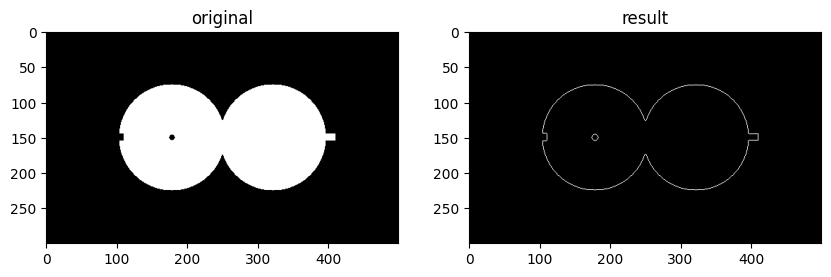

In [5]:
boundary_extraction = test - erosion(test,'circle' ,3)

_, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title('original')
ax1.imshow(test, 'gray')
ax2.set_title('result')
ax2.imshow(boundary_extraction, 'gray')
plt.show()